In [2]:
from itertools import product

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

iris = datasets.load_iris()
X = iris.data[:, [0, 2]] 
y = iris.target

In [24]:
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=4)

画图

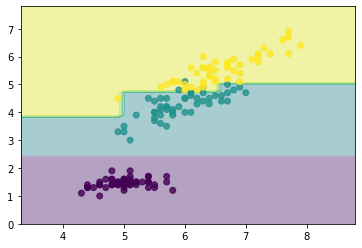

In [25]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4) # filled, 对等高线间的填充区域进行填充（使用不同的颜色）
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8) # 绘制散点图
plt.show()

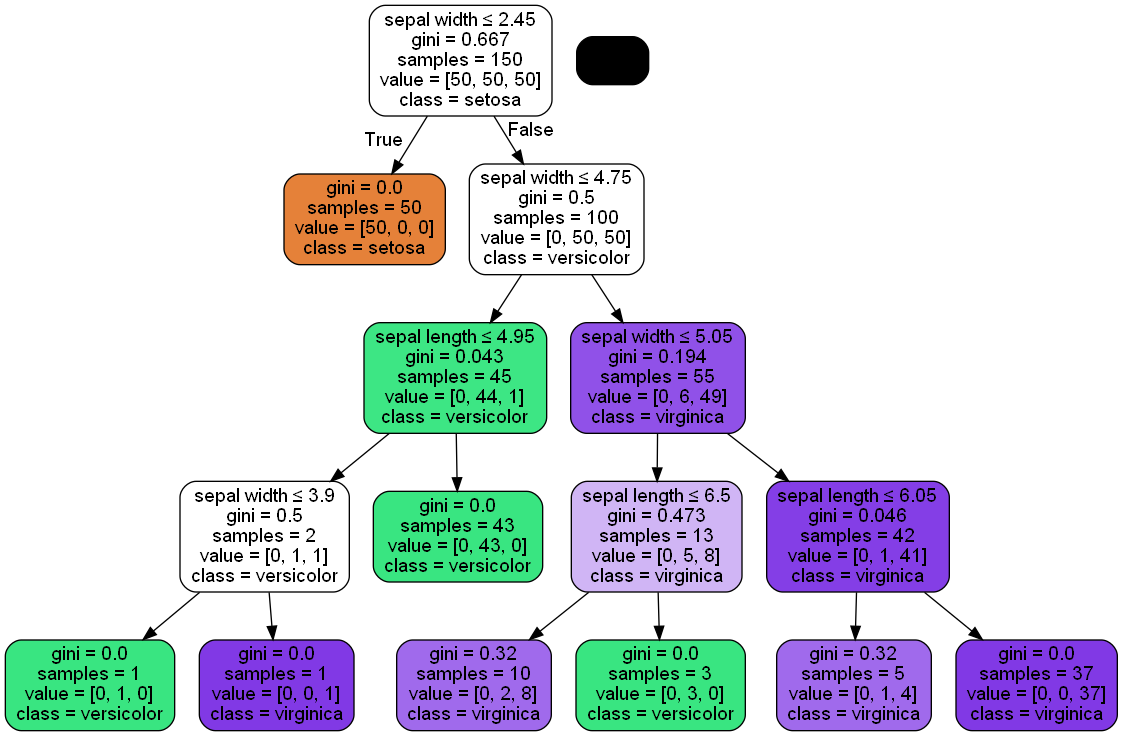

In [26]:
from IPython.display import Image  
from sklearn import tree
import pydotplus 
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=["sepal length","sepal width"],  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 